<a href="https://colab.research.google.com/github/SABRIS13/Deep_Learning/blob/main/DL_07_Series_de_tiempo_02_ejercicio_C4_W2_Lab_3_deep_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.2


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

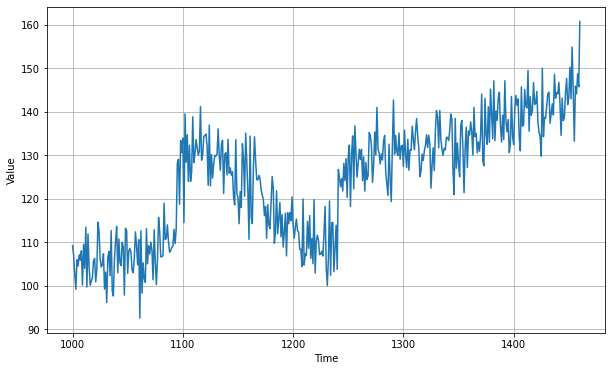

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)


In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)


1/1 [==============================] - 0s 16ms/step


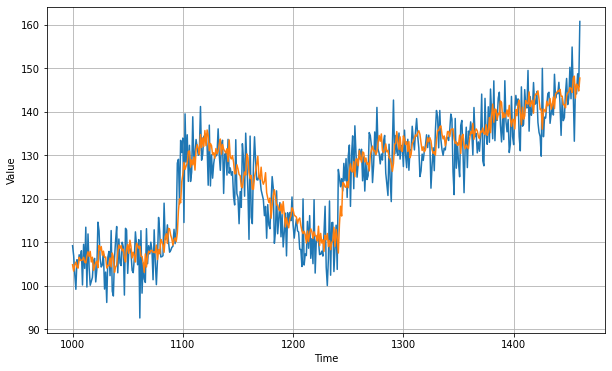

In [ ]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

4.564795

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=0)

(1e-08, 0.001, 0.0, 300.0)

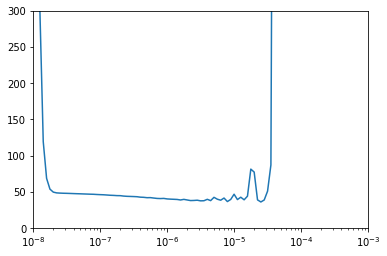

In [ ]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [ ]:
window_size = 30
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=8e-6, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=500, verbose=0)

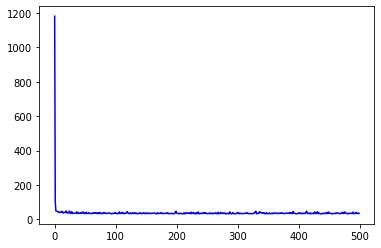

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[40.896121978759766, 41.121551513671875, 47.883731842041016, 40.96342468261719, 37.2911491394043, 41.165504455566406, 39.72187042236328, 41.9269905090332, 43.772640228271484, 49.507652282714844, 37.72980880737305, 39.946327209472656, 38.06708908081055, 37.559661865234375, 48.72340774536133, 43.4672966003418, 34.936912536621094, 38.180572509765625, 45.779842376708984, 35.001731872558594, 37.969417572021484, 35.60330581665039, 35.55036544799805, 35.64711380004883, 36.448699951171875, 37.79994201660156, 44.38081741333008, 34.75218963623047, 39.721038818359375, 40.52583312988281, 35.5778923034668, 34.97556686401367, 35.18366622924805, 39.655662536621094, 41.006675720214844, 35.12556838989258, 38.25803756713867, 44.22510528564453, 37.416568756103516, 34.501346588134766, 36.9400749206543, 34.02452850341797, 42.240543365478516, 35.9806022644043, 34.98394012451172, 34.266143798828125, 39.004478454589844, 35.712379455566406, 35.687374114990234, 34.35007095336914, 35.871665954589844, 34.55680084

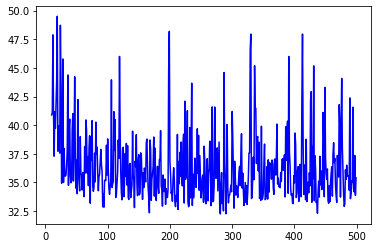

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

1/1 [==============================] - 0s 15ms/step


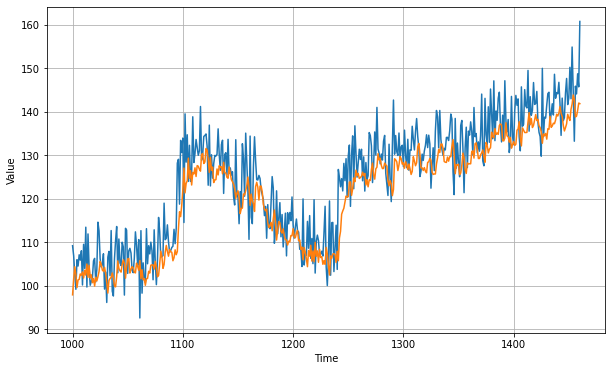

In [ ]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.319965

319 ['619', '4616'] check
311 ['611', '4607']
432 ['732', '4726']
305 ['605', '4603']
404 ['704', '4706']
321 ['621', '4618']
335 ['635', '4627']
408 ['708', '504']
318 ['618', '4614']
315 ['4609', '4809']
433 ['733', '4725']
401 ['701', '4701']
304 ['604', '4602']
416 ['4710', '4910']
330 ['630', '4624'] vainilla check
415 ['715', '4702']
323 ['623', '4718']
333 ['633', '4626']
322 ['622', '4620']
414 ['714', '4711']
307 ['607', '4606']
409 ['709', '4719']
419 ['719']
37 ['14']
417 ['717']
350 ['652']
405 ['705']
403 ['703']
347 ['647']
119 ['147']
424 ['724']
430 ['730']
434 ['734']
337 ['637']
308 ['4605']
331 ['631']
344 ['644']
320 ['620']
402 ['702']
345 ['645']
173 ['88']
348 ['648']
306 ['606']
303 ['4704']
118 ['146']
429 ['729']
343 ['643']
174 ['90']
342 ['642']
425 ['725']
184 ['89']
325 ['625']
435 ['735']
335 ['4627']
317 ['4613']
340 ['640']
427 ['727']
410 ['4721']
411 ['4723']
422 ['722']
341 ['641']
431 ['731']
349 ['651']
412 ['712']
437 ['737']
301 ['4601']
428 ['728']
337 ['637']
436 ['736']
501 ['801']
406 ['706']
1219 ['1302']
407 ['4715']